# Measurement chains 

[<< PREVIOUS TUTORIAL](01_04_coordinate_systems.ipynb)

## Overview

**This tutorial covers:**

The `MeasurementChain` class that describes in detail how the experimental date was acquired

**Requirements:**

- Opening and navigating through WelDX files ([tutorial](01_01_introduction.ipynb))
- Dealing with time-dependent data ([tutorial](01_02_time_dependent_data.ipynb))

In [1]:
# download the example file for this tutorial

from util import download_tutorial_input_file

download_tutorial_input_file(print_status=False)

## Plotting the measurement chain

When working with experimental data we sometimes need more information than just the pure data itself.
For example, we might want to know how large the measurement error can be or if the data has already been preprocessed before it was written to the file.
Getting this information might be challenging because the person who conducted the experiment might be not available to you or the information is simply lost because nobody remembers and it hasn't been documented.

WelDX solves this problem by enforcing that the experimental setup is actually documented and stored during the creation of a file.
Therefore, it uses a dedicated data structure called the `Measurement`.
Let's get it out of our example file and explore the information it provides.

As always, we get us a quick overview of the file content to find out how to access the data:

In [2]:
from weldx import WeldxFile

wxfile = WeldxFile("single_pass_weld.wx")

C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\asdf\asdf.py:330: AsdfWarning: File 'file:///C:/Users/vhirtham/PycharmProjects/bam/weldx/tutorials/single_pass_weld.wx' was created with extension URI 'asdf://weldx.bam.de/weldx/extensions/weldx-0.1.0' (from package weldx==0.5.0), which is not currently installed
  warnings.warn(msg, AsdfWarning)


In [3]:
wxfile.info()

root (dict)
├─TCP (LocalCoordinateSystem)
├─coordinate_systems (CoordinateSystemManager)
├─equipment (list)
│ ├─[0] (MeasurementEquipment)
│ ├─[1] (MeasurementEquipment)
│ └─[2] (MeasurementEquipment)
├─measurements (list)
│ ├─[0] (Measurement)
│ ├─[1] (Measurement)
│ ├─[2] (Measurement)
│ └─[3] (Measurement)
├─process (dict)
│ ├─shielding_gas (ShieldingGasForProcedure)
│ ├─weld_speed (TimeSeries)
│ ├─welding_process (GmawProcess)
│ └─welding_wire (dict)
│   ├─class (str)
│   ├─diameter (Q_)
│   └─wx_user (dict)
│     ├─charge id (str)
│     └─manufacturer (str)
├─reference_timestamp (Timestamp)
├─welding_current (TimeSeries)
├─welding_voltage (TimeSeries)
├─workpiece (dict)
│ ├─base_metal (dict)
│ │ ├─common_name (str)
│ │ └─standard (str)
│ └─geometry (dict)
│   ├─groove_shape (VGroove)
│   └─seam_length (Q_)
└─wx_user (dict)
  ├─WID (int)
  ├─operator (str)
  └─project (str)


From the file content we see, that there actually multiple `Measurement` objects stored under the key `"measurements"`.
Let's extract the list and print the names of all measurements by using the `name` attribute of the `Measurement` class:

In [4]:
measurements = wxfile["measurements"]
for measurement in measurements:
    print(measurement.name)

welding current
welding voltage
temperature T1
temperature T2


From the output we learn that there are a current, voltage and two temperature measurements.
We will pick the current measurement for further discussion:

In [5]:
current_measurement = measurements[0]

The `Measurement` class is just a data container that stores the name of a measurement, the data that belongs to it, and a special class called `MeasurementChain`.
The `MeasurementChain` documents the setup of a measurement and provides a complete overview of the different involved processing steps.
Let's extract it from the `Measurement` class:


In [9]:
current_measurement_chain = current_measurement.measurement_chain

The easiest way to get an overview of the `MeasurementChain` is to call the `plot` function:

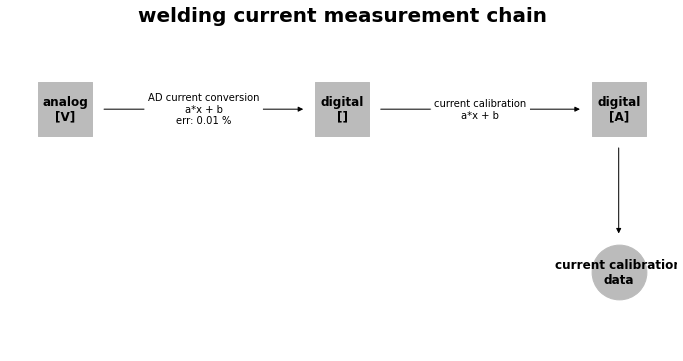

In [11]:
current_measurement_chain.plot();

As you can see in the flow chart, we had an initial analog signal that was converted to a digital one by an AD converter.
By applying the calibration, we finally got a digital signal that corresponds to the welding current.
We only stored values after the last transformation step as measurement data.

The plot also shows us the formulas of the transformation step.
Furthermore, the error percentage of the AD-conversion is shown.

## Extracting the data

With the `get_signal_data` function, we can extract the data from the `MeasurementChain`.
But this requires us to provide the name of the signal that was recorded.
The signal name is equal to the preceding transformation or source name.
We could deduce this from the plot, but another way is to use the `transformation_names` and `source_name` functions.

In [16]:
current_measurement_chain.transformation_names

['AD current conversion', 'current calibration']

In [18]:
current_measurement_chain.source_name

'Current Sensor'

Because only the data after the calibration step was stored, we use `"current_calibration"` as input to `get_signal_data`.

In [20]:
current_data = current_measurement_chain.get_signal_data("current calibration")

The returned data is a `TimeSeries` that was [introduced in an earlier tutorial](01_02_time_dependent_data.ipynb).
We can simply call its `plot` function to take a look at the data:

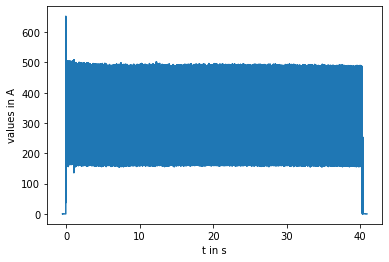

In [22]:
current_data.plot();

## Conclusion

This tutorial demonstrated that WelDX provides a class called `MeasurementChain` that captures not only the measurement data itself but also important meta data about how it was gathered.
It has a useful visualization method that provides a quick overview over the experimental setup.

## Further readings

- [`MeasurementChain` - full tutorial](measurement_chain.ipynb)

[<< PREVIOUS TUTORIAL](01_04_coordinate_systems.ipynb)